### Time Series Anylysis

Dataset contains number of passengers for rail company. Columns `Count` is number of passengers in a specific hour window.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
#import data

In [6]:
train_raw = pd.read_csv('../data/Train_SU63ISt.csv')
test_raw = pd.read_csv('../data/Test_0qrQsBZ.csv')

In [7]:
train_raw.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [8]:
def preprocess_dataset(dataset):
    
    dataset = dataset.drop('ID', axis=1)
    dataset['Datetime'] = pd.to_datetime(dataset['Datetime'],format='%d-%m-%Y %H:%M')

    dataset['year'] = dataset.Datetime.dt.year 
    dataset['month'] = dataset.Datetime.dt.month 
    dataset['day'] = dataset.Datetime.dt.day
    dataset['Hour'] = dataset.Datetime.dt.hour 

    dataset['day_of_week'] = dataset['Datetime'].dt.dayofweek
    dataset['is_weekend'] = dataset['day_of_week'].apply(lambda x: 1 if x >=5 else 0)
    
    dataset.set_index('Datetime', inplace=True)
    
    return dataset

In [9]:
train = preprocess_dataset(train_raw)

In [10]:
#train = train['2012-08-25':'2014-09-25']

In [11]:
test = preprocess_dataset(test_raw)

In [12]:
#test = test['2014-09-26':'2014-12-31']

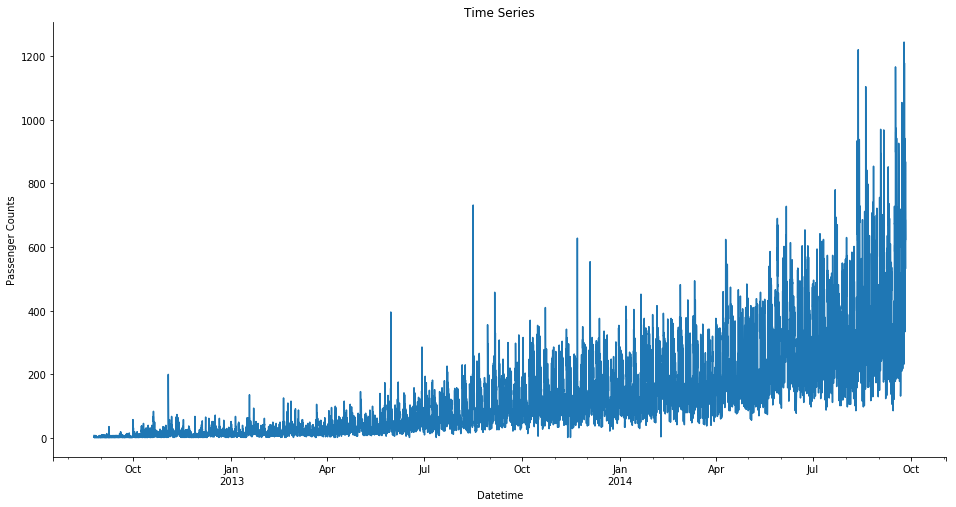

In [13]:
fig, ax = plt.subplots(figsize=(16,8))

ax = train['Count'].plot(title='Time Series')

ax.set_xlabel('Datetime')
ax.set_ylabel('Passenger Counts')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### EDA

Some hypothesis to verify:

- Traffic will increase as the years pass by
- Traffic will be high from May to October
- Traffic on weekdays will be more
- Traffic during the peak hours will be high

In [14]:
agg_years = train.groupby('year')['Count'].mean()

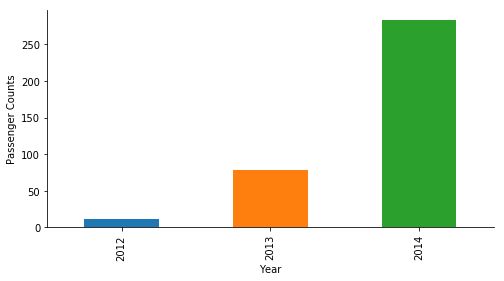

In [15]:
fig, ax = plt.subplots(figsize=(8,4))

ax = agg_years.plot(kind='bar')

ax.set_xlabel('Year')
ax.set_ylabel('Passenger Counts')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [16]:
agg_months = train.groupby('month')['Count'].mean()

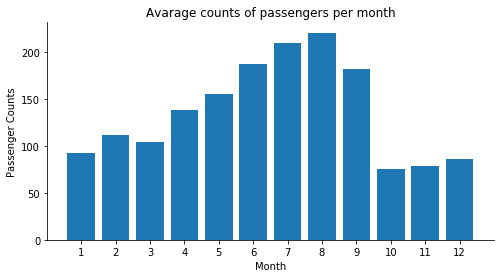

In [17]:
fig, ax = plt.subplots(figsize=(8,4))

ax.bar(x = agg_months.index, height=agg_months)


ax.set_xlabel('Month')
ax.set_ylabel('Passenger Counts')
ax.set_xticks(agg_months.index)

ax.set_title('Avarage counts of passengers per month')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [18]:
agg_months_year = train.groupby(by=['year','month'])['Count'].mean()

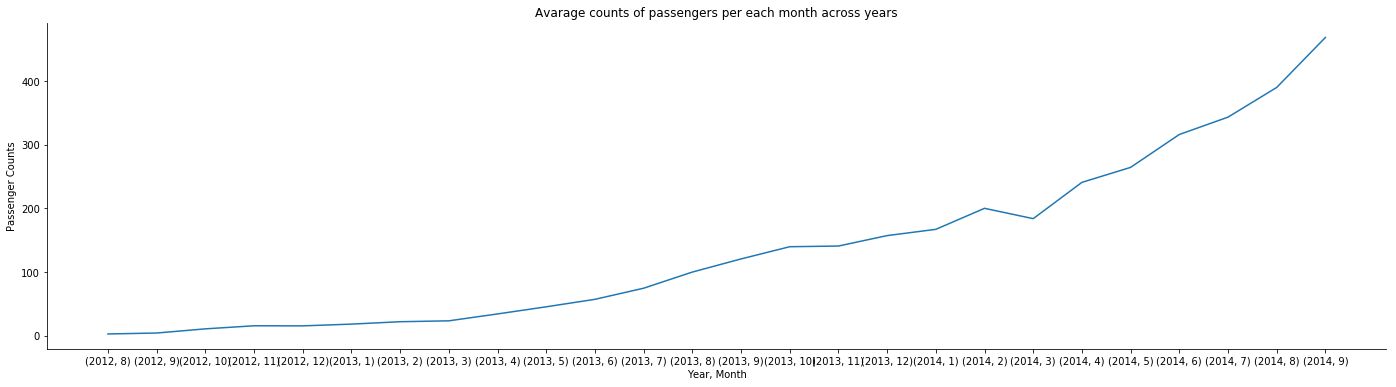

In [19]:
fig, ax = plt.subplots(figsize=(24,6))

ax = agg_months_year.plot(xticks=list(agg_months_year.reset_index().index))

ax.set_xlabel('Year, Month')
ax.set_ylabel('Passenger Counts')

ax.set_title('Avarage counts of passengers per each month across years')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [20]:
agg_days = train.groupby('day')['Count'].mean()

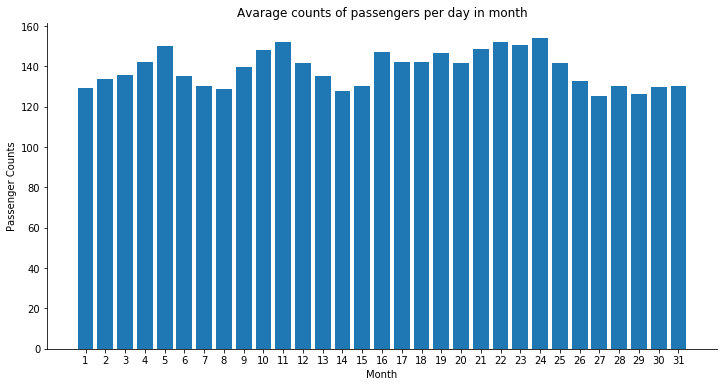

In [21]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x = agg_days.index, height=agg_days)


ax.set_xlabel('Month')
ax.set_ylabel('Passenger Counts')
ax.set_xticks(agg_days.index)

ax.set_title('Avarage counts of passengers per day in month')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [22]:
agg_hours = train.groupby('Hour')['Count'].mean()

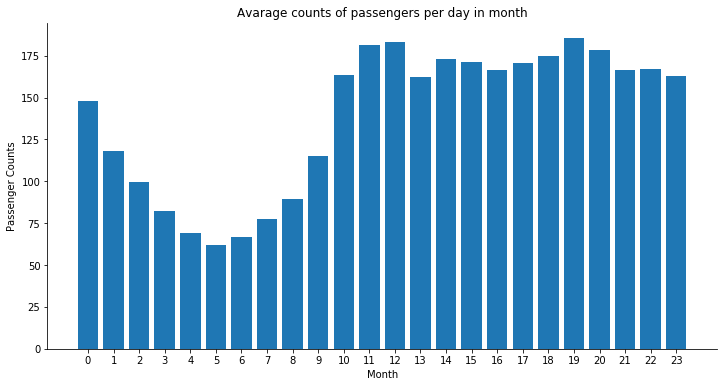

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x = agg_hours.index, height=agg_hours)


ax.set_xlabel('Month')
ax.set_ylabel('Passenger Counts')
ax.set_xticks(agg_hours.index)

ax.set_title('Avarage counts of passengers per day in month')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [24]:
agg_dayofweek = train.groupby('day_of_week')['Count'].mean()

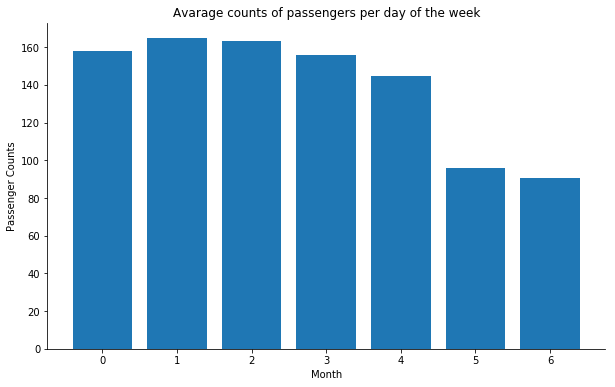

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x = agg_dayofweek.index, height=agg_dayofweek)


ax.set_xlabel('Month')
ax.set_ylabel('Passenger Counts')
ax.set_xticks(agg_dayofweek.index)

ax.set_title('Avarage counts of passengers per day of the week')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

There is a lot of noise in the hourly time series, I will aggregate the hourly time series to daily, weekly and monthly time series 

to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [26]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

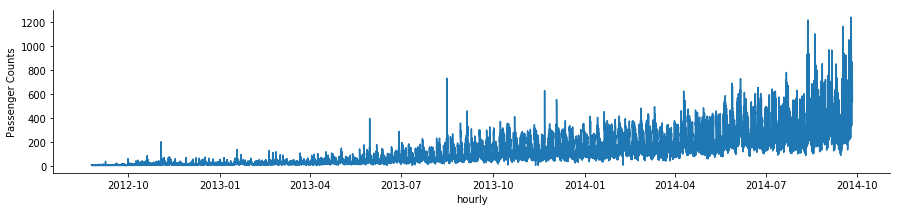

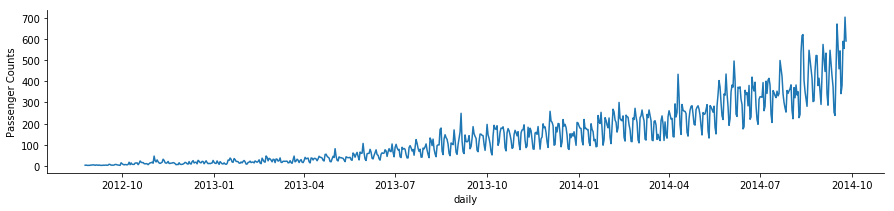

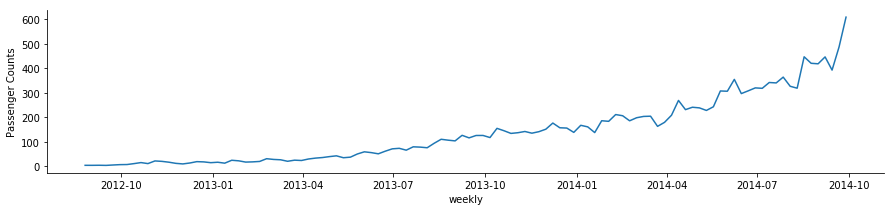

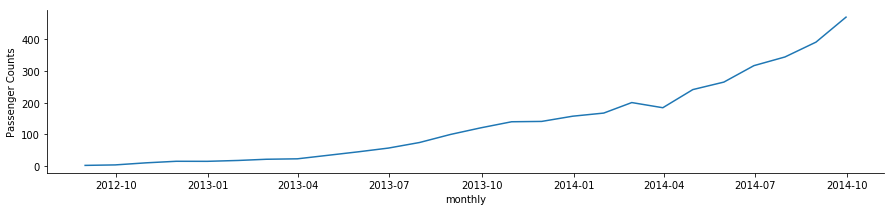

In [27]:
fig, ax = plt.subplots(figsize=(15,3))

ax.plot(hourly.Count)
ax.set_xlabel('hourly')
ax.set_ylabel('Passenger Counts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(daily.Count)
ax.set_xlabel('daily')
ax.set_ylabel('Passenger Counts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(weekly.Count)
ax.set_xlabel('weekly')
ax.set_ylabel('Passenger Counts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(monthly.Count)
ax.set_xlabel('monthly')
ax.set_ylabel('Passenger Counts')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [28]:
train_D = train.resample('D').sum()

#### Time based validation 

I split data that last 3 months are validation set.

In [29]:
dTrain=train_D['2012-08-25':'2014-06-24']
dValid=train_D['2014-06-25':'2014-09-25']

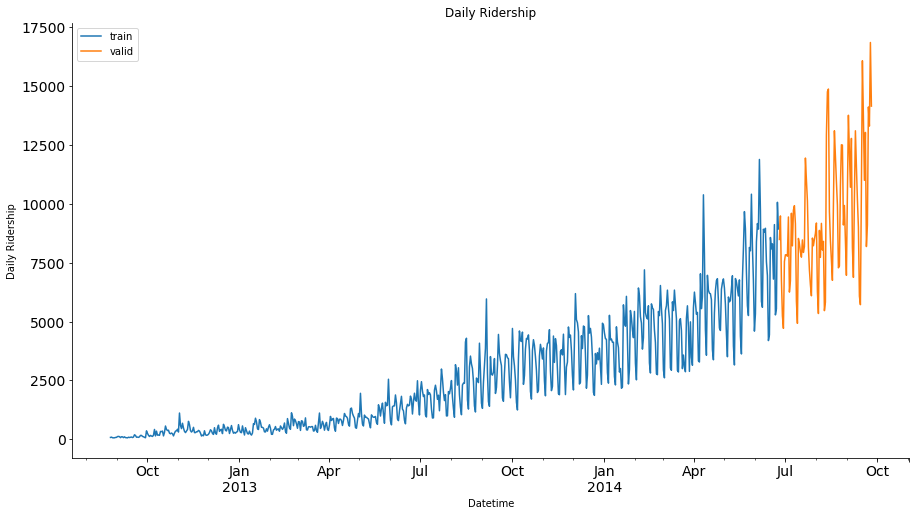

In [30]:
fig, ax = plt.subplots(figsize=(15,3))

ax = dTrain.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
ax = dValid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')



ax.set_xlabel('Datetime')
ax.set_ylabel('Daily Ridership')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='best')

plt.show()

In [31]:
# Moving average

In [42]:
dTrain_log = np.log(dTrain['Count'])
moving_avg = dTrain_log.rolling(24).mean()

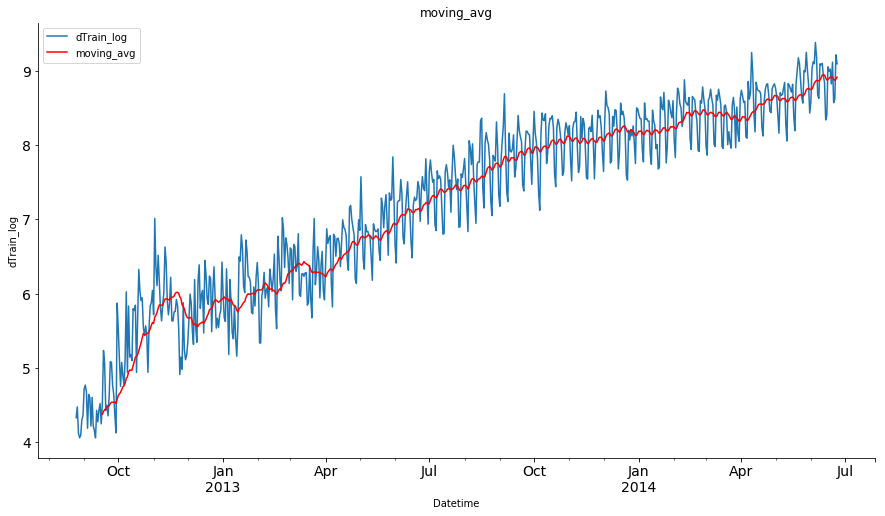

In [43]:
fig, ax = plt.subplots(figsize=(15,3))

ax = dTrain_log.plot(figsize=(15,8), title= 'dTrain_log', fontsize=14, label='dTrain_log')
ax = moving_avg.plot(figsize=(15,8), title= 'moving_avg', fontsize=14, label='moving_avg', c='r')



ax.set_xlabel('Datetime')
ax.set_ylabel('dTrain_log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='best')

plt.show()

In [44]:
from statsmodels.tsa.stattools import adfuller

In [50]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    
    fig, ax = plt.subplots(figsize=(18,8))
    
    orig = ax.plot(timeseries, color='blue',label='Original')
    mean = ax.plot(rolmean, color='red', label='Rolling Mean')
    std = ax.plot(rolstd, color='black', label = 'Rolling Std')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [51]:
### Removing Trend

In [52]:
dTrain_log_moving_avg_diff = dTrain_log - moving_avg

In [53]:
dTrain_log_moving_avg_diff.dropna(inplace = True)

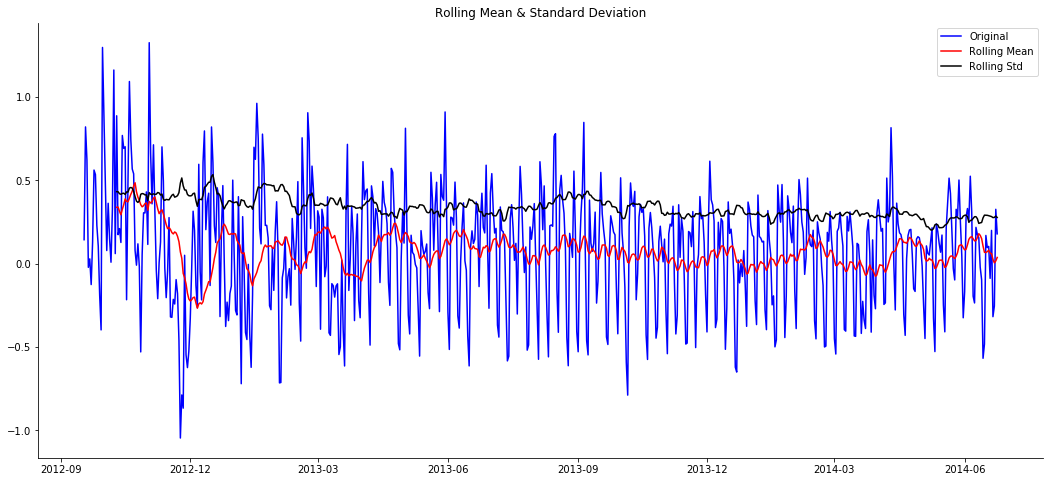

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [54]:
test_stationarity(dTrain_log_moving_avg_diff)

In [55]:
# Stabilize the mean of the time series which is also a requirement for a stationary time series
# Differencing can help to make the series stable and eliminate the trend

In [56]:
dTrain_log_diff = dTrain_log - dTrain_log.shift(1)

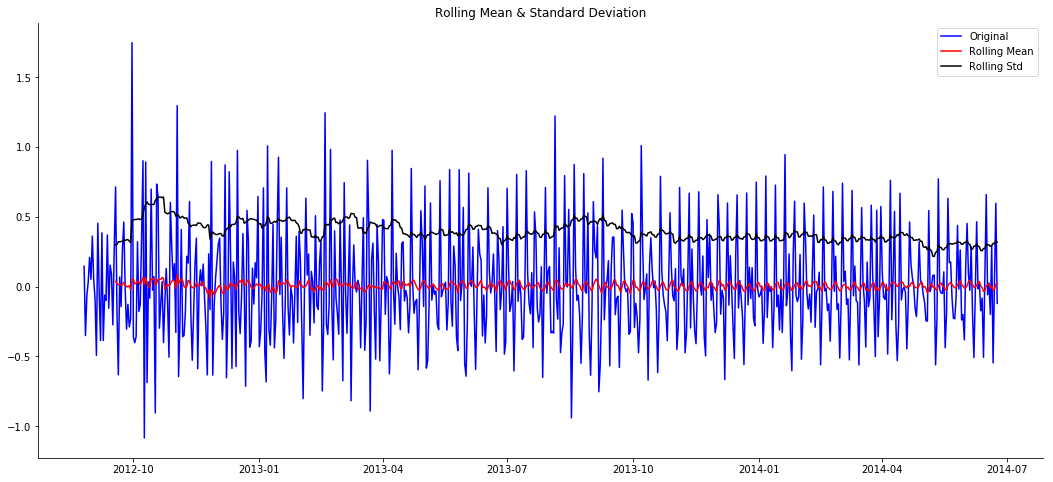

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [57]:
test_stationarity(dTrain_log_diff.dropna())

In [58]:
### Removing Seasonality

I will use seasonal decompose to decompose the time series into trend, seasonality and residuals

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
decomposition = seasonal_decompose(pd.DataFrame(dTrain_log).Count.values, freq=24)

In [61]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

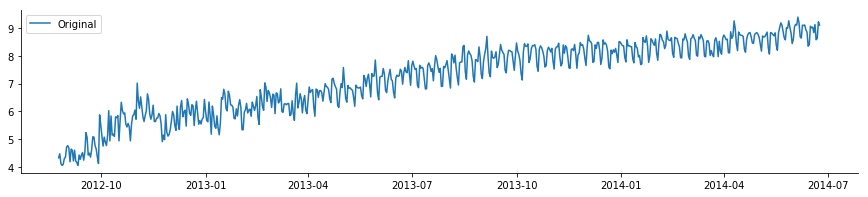

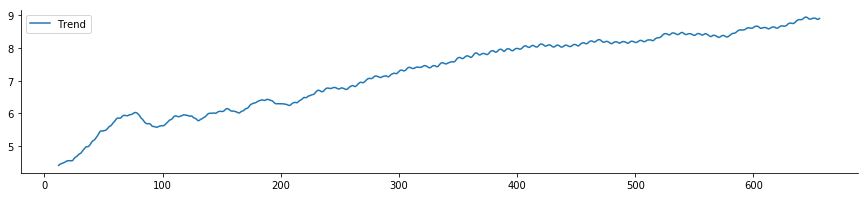

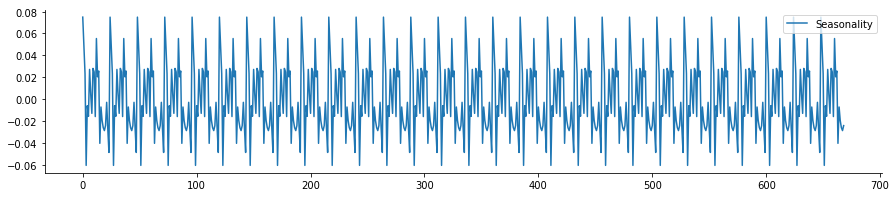

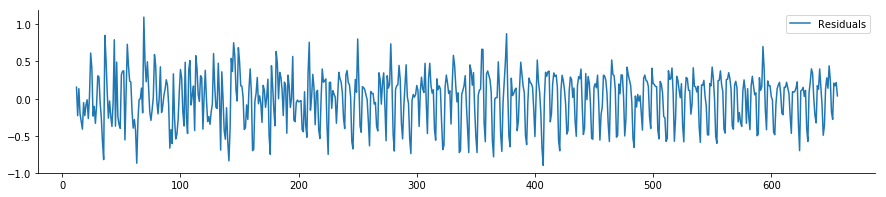

In [62]:
fig, ax = plt.subplots(figsize=(15,3))

ax.plot(dTrain_log, label='Original')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(trend, label='Trend')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(seasonal, label='Seasonality')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig, ax = plt.subplots(figsize=(15,3))

ax.plot(residual, label='Residuals')
plt.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [63]:
# Check stationarity of residuals.

In [64]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = dTrain_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)

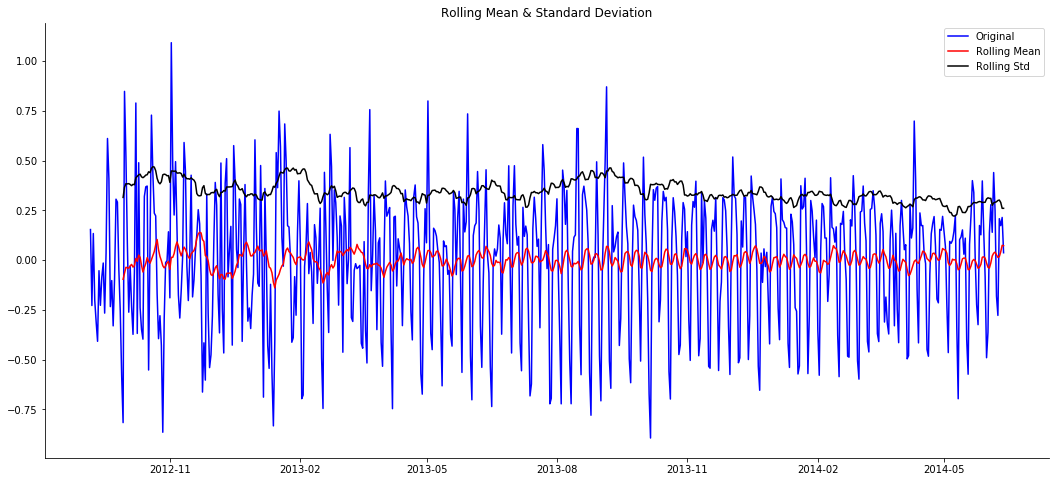

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [65]:
test_stationarity(train_log_decompose[0])

### Forecasting the time series using ARIMA

ARIMA is parametrized by tree main params p,d,q. Basically ARIMA incorporated AR (auto regression) and MA (moving average) models. By parameters we control influence of each component. 

**Number of AR (Auto-Regressive) terms (p)**: AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5)

**Number of MA (Moving Average) terms (q)**: MA terms are lagged forecast errors in prediction equation. 
For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value

**Number of Differences (d)**: These are the number of nonseasonal differences, i.e. in this case we took the first order difference. 


So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results

In [66]:
from statsmodels.tsa.arima_model import ARIMA

In [67]:
model = ARIMA(dTrain_log_diff.dropna(), order=(2, 0, 2))  

In [68]:
results_ARIMA = model.fit(disp=-1)  

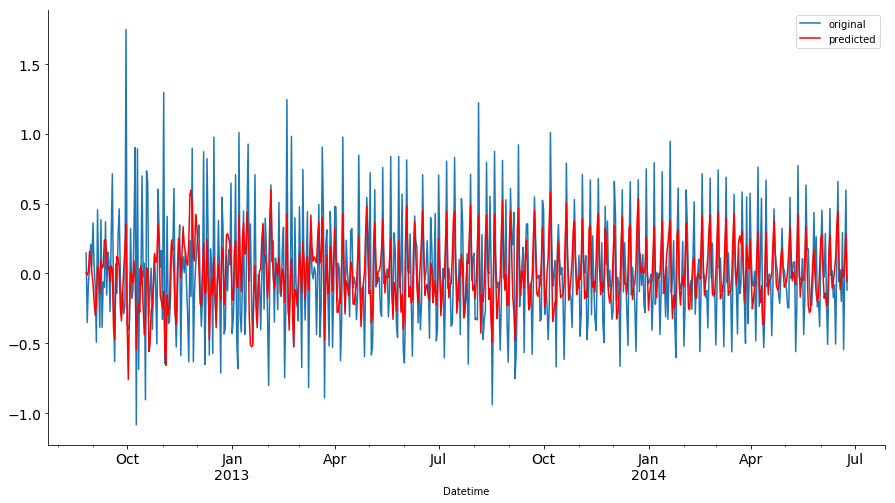

In [69]:
fig, ax = plt.subplots(figsize=(15,3))

ax = dTrain_log_diff.dropna().plot(figsize=(15,8),  fontsize=14, label='original')
ax = results_ARIMA.fittedvalues.plot(figsize=(15,8), fontsize=14, c='red', label='predicted')

ax.set_xlabel('Datetime')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='best')

plt.show()

In [70]:
# Function to change the scale of the model to the original scale

In [71]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    fig, ax = plt.subplots(figsize=(15,3))

    ax = given_set['Count'].plot(figsize=(15,8),  fontsize=14, label='Given_set')
    ax = predict.plot(figsize=(15,8), fontsize=14, c='red', label='Predict')

    ax.set_xlabel('Datetime')
    ax.set_ylabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.legend(loc='best')
    
    plt.show()

In [72]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    fig, ax = plt.subplots(figsize=(15,3))

    ax = given_set['Count'].plot(figsize=(15,8),  fontsize=14, label='Given_set')
    ax = predict.plot(figsize=(15,8), fontsize=14, c='red', label='Predict')

    ax.set_xlabel('Datetime')
    ax.set_ylabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.legend(loc='best')
    
    plt.show()

In [73]:
# Prediction for validation set

In [74]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

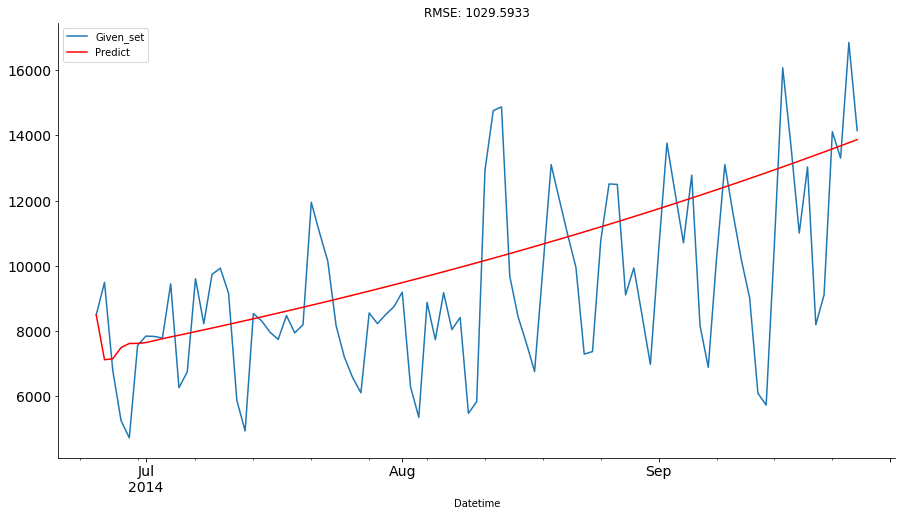

In [75]:
check_prediction_diff(ARIMA_predict_diff, dValid)

In [76]:
model = ARIMA(dTrain_log_diff.dropna(), order=(2, 0, 2))  

In [77]:
results_ARIMA = model.fit(disp=-1)  

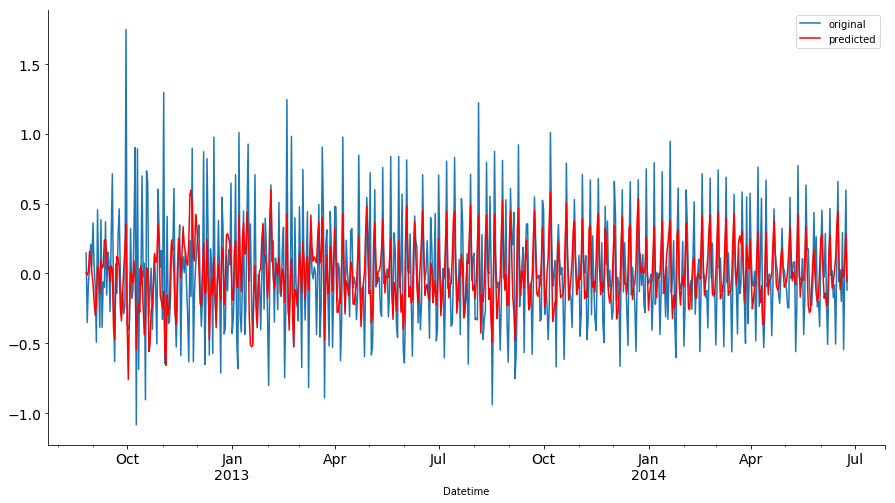

In [78]:
fig, ax = plt.subplots(figsize=(15,3))

ax = dTrain_log_diff.dropna().plot(figsize=(15,8),  fontsize=14, label='original')
ax = results_ARIMA.fittedvalues.plot(figsize=(15,8), fontsize=14, c='red', label='predicted')

ax.set_xlabel('Datetime')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='best')

plt.show()

In [79]:
# Prediction for validation set

In [80]:
def check_prediction_diff_with_train(predict_diff, given_set, dTrain):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    fig, ax = plt.subplots(figsize=(15,3))
    ax = dTrain['Count'].plot(figsize=(15,8),  fontsize=14, label='Train_set')
    ax = given_set['Count'].plot(figsize=(15,8),  fontsize=14, label='Given_set')
    ax = predict.plot(figsize=(15,8), fontsize=14, c='red', label='Predict')

    ax.set_xlabel('Datetime')
    ax.set_ylabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.legend(loc='best')
    
    plt.show()

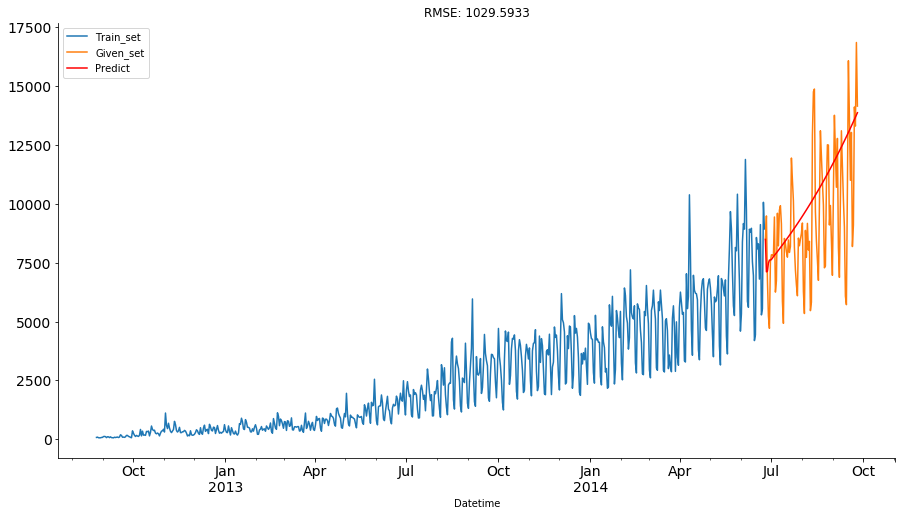

In [81]:
check_prediction_diff_with_train(ARIMA_predict_diff, dValid, dTrain)

### Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook.

In [82]:
import pandas as pd
from fbprophet import Prophet

In [87]:
df_train = dTrain.loc[:, ['Count']]

In [88]:
df_train.rename(columns={'Count': 'Y'}, inplace=True)
df_train.reset_index(inplace=True)
df_train.rename(columns={'Datetime': 'ds', 'Y': 'y'}, inplace=True)

In [90]:
m = Prophet()
m.fit(df_train)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
future = m.make_future_dataframe(periods=len(dValid))
future.tail()

,ds
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24
761,2014-09-25


In [94]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
757,2014-09-21,8191.883832,7248.277362,9160.428137
758,2014-09-22,9521.294952,8565.942245,10461.518579
759,2014-09-23,9575.639142,8595.147756,10538.590984
760,2014-09-24,9544.770335,8605.574563,10547.166174
761,2014-09-25,9556.206791,8577.877837,10556.570740


In [97]:
dValid.tail()

,Count,year,month,day,Hour,day_of_week,is_weekend
Datetime,,,,,,,
2014-09-21,9102,48336,216,504,276,144,24
2014-09-22,14116,48336,216,528,276,0,0
2014-09-23,13304,48336,216,552,276,24,0
2014-09-24,16856,48336,216,576,276,48,0
2014-09-25,14152,48336,216,600,276,72,0


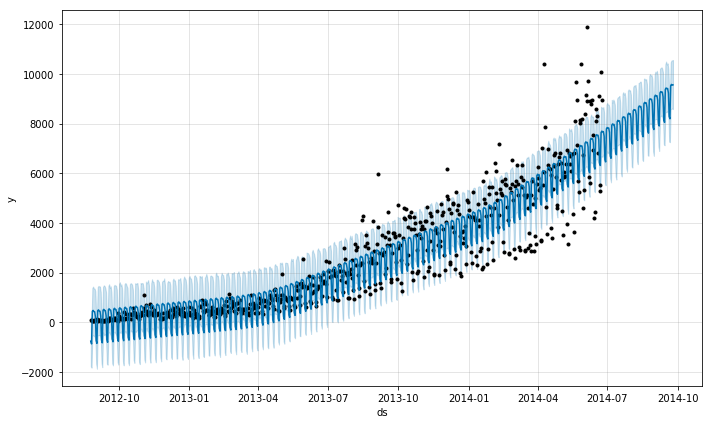

In [95]:
fig1 = m.plot(forecast)

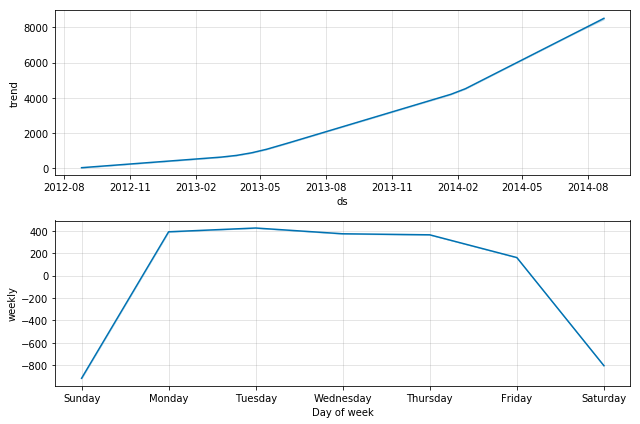

In [169]:
fig2 = m.plot_components(forecast)

In [98]:
from sklearn.metrics import mean_squared_error

In [105]:
rmse = np.sqrt(mean_squared_error(dValid['Count'], forecast['yhat'][-93:]))

In [134]:
print('RMSE: {}'.format(round(rmse,1)))

RMSE: 2336.4


In [129]:
dValid['Predicted']  = pd.Series(data=forecast['yhat'][-93:].values, index=dValid.index)

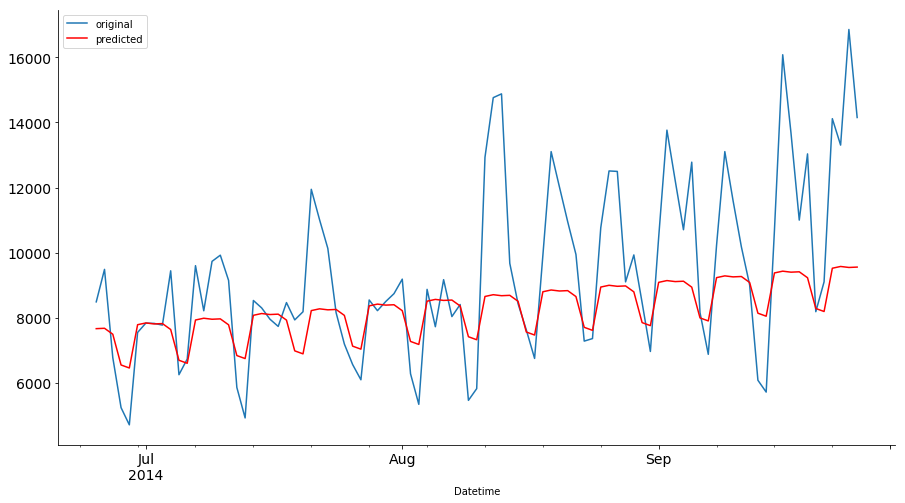

In [131]:
fig, ax = plt.subplots(figsize=(15,3))

ax = dValid['Count'].plot(figsize=(15,8),  fontsize=14, label='original')
ax = dValid['Predicted'] .plot(figsize=(15,8), fontsize=14, c='red', label='predicted')

ax.set_xlabel('Datetime')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc='best')

plt.show()

### Summary

Performing EDA allowed to ansew some general hypothesis about dependencies in time series data.

Then we tested stationary of data with Dickey Fuller test. The intuition behind this test is that it determines how strongly a time series is defined by a trend. 
Data aquired to be non-stationary. I used performed transformation to make data stationary and then forcast the time series using ARIMA.

Last I used basic methods of Prophet library to get preliminary results. Although I don't get deep into library nuances yet, Prophet seems to be very powerful and definitely worth further exploration.     

